<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 23. Mai, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Monde auf der Überholspur</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

Die Monde **Janus** und **Epimetheus** umkreisen den Planeten Saturn *koorbital*, d.h. auf nahezu der gleichen Bahn.
Bemerkenswerterweise ist dabei der Bahnunterschied zwischen dem inneren und dem äußeren der beiden Monde deutlich
kleiner als deren Durchmesser. Alle vier Jahre begegnen sich die beiden Monde, da der innere Mond ein wenig schneller unterwegs ist als der Äußere. Wieso es dabei nicht zu einer Kollision kommt, wollen wir in dieser Aufgabe untersuchen.

Dazu wollen wir das **3-Körper-System** aus Saturn, Janus und  Epimetheus simulieren. Für die Simulation bewegen wir uns ins Bezugssystem des Saturn. Zwischen zwei Körpern wirkt dann eine Gravitationskraft gemäß

\begin{equation}
\mathbf{F}_{12}=-G\frac{m_1 m_2}{|\mathbf{r}_1-\mathbf{r}_2|^3}\left(\mathbf{r}_1-\mathbf{r}_2\right),
\end{equation}

wobei wir die Gravitationskonstante $G = 1$ setzen (wodurch sich die Größen der Parameter natürlich von den realistischen unterscheiden). Berechnen Sie die Bahnen der Monde mittels des **Verlet**-Verfahrens und plotten Sie die Bahnkurven der Monde. Verwenden Sie folgende Startwerte:

\begin{align*}
m_1 &= 1 \\
m_2 &= 4 \\
m_{\text{Saturn}} &= 4\times10^4 \\
\mathbf{r}_1 &= (-155, 0) \quad \frac{d\mathbf{r}_1}{dt} = (0, -16.1) \\
\mathbf{r}_2 &= (150, 0), \quad \frac{d\mathbf{r}_2}{dt} = (0, 16.3)
\end{align*}

### Bemerkungen

* berechnet wird die Bewegung zweier Monde der Massen $m_1$ und $m_2$ um ein Zentrum der Masse $M$
* der Zentralkörper (hier: Saturn) ruht im Ursprung des Koordinatensystems
* die *reduzierte Masse* $\mu$ muss nicht berechnet werden, da $M\gg m_1, m_2$
* der *Schwerpunkt* liegt aus dem selben Grund im Ursprung
* die Formel für die Verlet-Methode lautet: $x_{i+1} = 2\cdot x_{i} - x_{i-1} + a_i\cdot\Delta t^2$
* die Werte für die Beschleunigungen $a_i(t)$ sind für die Berechnung notwendig, aber uninteressant

### initialize

In [1]:
# initialize values and F
G    = 1
m1   = 1
m2   = 4
M    = 4e4
R    = [0, 0]
r1_0 = [-155, 0]
v1_0 = [0, -16.1]
r2_0 = [150, 0]
v2_0 = [0, 16.3]
F(m1, m2, r1, r2) = -G*m1*m2*(r2-r1)/norm(r2-r1)^3

# set time interval and steps
t0    = 0
t1    = 1000
dt    = 1e-3
times = collect(t0:dt:t1)
# set functions for total a
a(r1, r2, m1, m2) = (F(m1, m2, r1, r2) + F(m1, M, R, r1))./m1

a (generic function with 1 method)

### Verlet-method

In [2]:
# initialize arrays for verlet
r1s = fill([.0,.0], length(times))
r2s = fill([.0,.0], length(times))
r1s[1] = r1_0
r2s[1] = r2_0

# start verlet
# calc r(t0 + dt)
r1s[2] = r1_0 + v1_0*dt + 0.5a(r1_0, r2_0, m1, m2)*dt^2
r2s[2] = r2_0 + v2_0*dt + 0.5a(r2_0, r1_0, m2, m1)*dt^2

2-element Array{Float64,1}:
 150.0   
   0.0163

In [3]:
# verlet: calc rest of the r values
for i in 2:length(times)-1
    r1i = r1s[i]
    r2i = r2s[i]
    r1s[i+1] = 2*r1i-r1s[i-1]+a(r1i, r2i, m1, m2)*dt^2
    r2s[i+1] = 2*r2i-r2s[i-1]+a(r2i, r1i, m2, m1)*dt^2
end

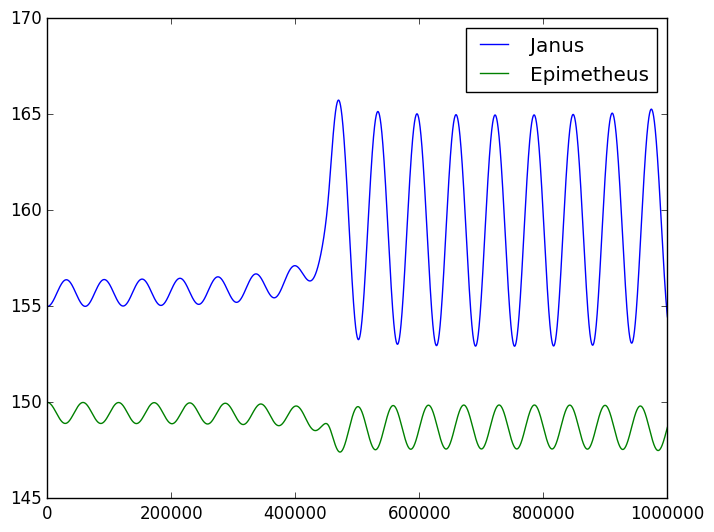

In [4]:
using PyPlot

figure()
abs_r1    = zeros(times)
abs_r2    = zeros(times)
ri_deltas = zeros(times)
for i in 1:length(times)
    abs_r1[i]    = norm(r1s[i])
    abs_r2[i]    = norm(r2s[i])
    ri_deltas[i] = norm(r2s[i] - r1s[i])
end

plot(abs_r1, label="Janus")
plot(abs_r2, label="Epimetheus")
legend()
;

In der obigen Abbildung werden die Radien der Mondbahnen dargestellt, also immer der Abstand zwischen dem jeweiligen Mondmittelpunkt und dem Mittelpunkt des Saturn.

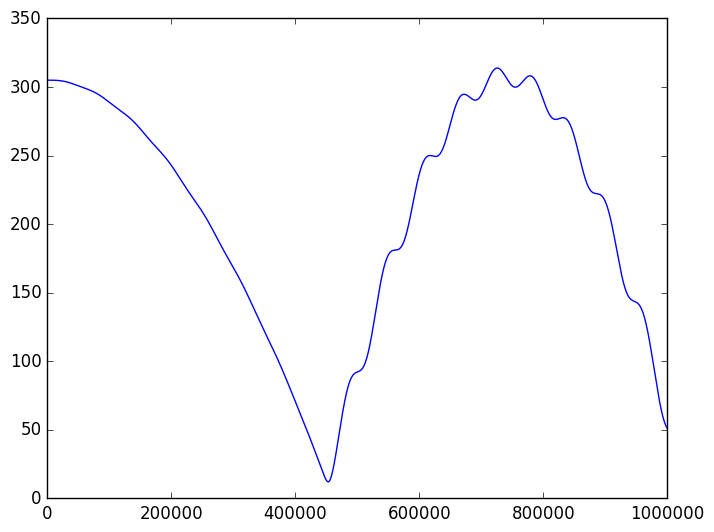

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8b9b716550>

In [5]:
figure()
plot(ri_deltas)